In [518]:
import numpy as np
import pandas as pd

In [519]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [520]:
#ls

In [521]:
#cd ./drive/MyDrive/

In [522]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [523]:
test_df = pd.read_csv("./input/test.csv")
train_df = pd.read_csv("./input/train.csv")

In [524]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [525]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [526]:
test_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [527]:
#データタイム型を年、月、週、時間に分割する
train_df['datetime_original'] = pd.to_datetime(train_df['datetime'])

train_df['year']=pd.DatetimeIndex(train_df['datetime_original']).year
train_df['month']=pd.DatetimeIndex(train_df['datetime_original']).month
train_df['weekday']=pd.DatetimeIndex(train_df['datetime_original']).weekday
train_df['hour']=pd.DatetimeIndex(train_df['datetime_original']).hour

In [528]:
#変換できているか確認
train_df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_original,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,5,0


In [529]:
#データタイム型を年、月、週、時間に分割する
test_df['datetime_original'] = pd.to_datetime(test_df['datetime'])

test_df['year']=pd.DatetimeIndex(test_df['datetime_original']).year
test_df['month']=pd.DatetimeIndex(test_df['datetime_original']).month
test_df['weekday']=pd.DatetimeIndex(test_df['datetime_original']).weekday
test_df['hour']=pd.DatetimeIndex(test_df['datetime_original']).hour

In [530]:
test_df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_original,year,month,weekday,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,2011,1,3,0


In [531]:
#学習データの整形
df_y = train_df['count']
df_X = train_df.drop(['datetime','casual','registered','count','datetime_original'],axis=1)

In [532]:
df_y = df_y.astype(int)
df_X = df_X.astype(int)

In [533]:
df_y.head(3)

0    16
1    40
2    32
Name: count, dtype: int32

In [534]:
df_X.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,weekday,hour
0,1,0,0,1,9,14,81,0,2011,1,5,0
1,1,0,0,1,9,13,80,0,2011,1,5,1
2,1,0,0,1,9,13,80,0,2011,1,5,2


In [535]:
#sklearnとxgboostをインポート
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [536]:
#訓練・テストデータに分割
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, shuffle=True)

In [537]:
#xgboostようにデータを整形
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

In [538]:
%%time
params ={'max_depth':10,
            'min_child_weight':2,
            'gamma':0.4,
            'subsample':0.9,
            'colsample_bytree':1,
            'reg_alpha':100,
            'n_estimators':1000,
            'reg_lambda':0.1,
            'learning_rate':0.1,
            "objective" : "reg:squarederror",
            "eval_metric" : "rmsle"
            }
model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dtest, "valid")],
    num_boost_round = 100,
    early_stopping_rounds= 50,
)
"""
model = xgb.XGBRegressor(silent=False,n_jobs=-1)
model_grid = GridSearchCV(model, cv_params, cv=5, n_jobs=-1)
model_grid.fit(X_train,
                y_train,
                early_stopping_rounds=50,
                eval_set=[(X_test, y_test)],
                eval_metric='rmsle',
                verbose=0)
print('optimal_parameters\n', model_grid.best_params_)
"""

[23:38:13] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmsle:2.10289	valid-rmsle:2.10430
[1]	train-rmsle:1.55915	valid-rmsle:1.55717
[2]	train-rmsle:1.24480	valid-rmsle:1.24520
[3]	train-rmsle:1.03129	valid-rmsle:1.03900
[4]	train-rmsle:0.87652	valid-rmsle:0.89044
[5]	train-rmsle:0.75643	valid-rmsle:0.77438
[6]	train-rmsle:0.66331	valid-rmsle:0.68557
[7]	train-rmsle:0.58877	valid-rmsle:0.61650
[8]	train-rmsle:0.52848	valid-rmsle:0.56096
[9]	train-rmsle:0.47916	valid-rmsle:0.51474
[10]	train-rmsle:0.43719	valid-rmsle:0.47737
[11]	train-rmsle:0.40255	valid-rmsle:0.44638
[12]	train-rmsle:0.37413	valid-rmsle:0.42276
[13]	train-rmsle:0.34994	valid-rmsle:0.40390
[14]	train-rmsle:0.33035	valid-rmsle:0.38891
[15

"\nmodel = xgb.XGBRegressor(silent=False,n_jobs=-1)\nmodel_grid = GridSearchCV(model, cv_params, cv=5, n_jobs=-1)\nmodel_grid.fit(X_train,\n                y_train,\n                early_stopping_rounds=50,\n                eval_set=[(X_test, y_test)],\n                eval_metric='rmsle',\n                verbose=0)\nprint('optimal_parameters\n', model_grid.best_params_)\n"

In [539]:
#予測
y_pred_train = model.predict(xgb.DMatrix(X_train))
y_pred_test = model.predict(xgb.DMatrix(X_test))

In [540]:
y_pred_train = y_pred_train.astype(int)
y_pred_train[y_pred_train<0] = 0
y_pred_test = y_pred_test.astype(int)
y_pred_test[y_pred_test<0] = 0

In [541]:
# 学習モデルの評価（RMSEを計算）
from sklearn.metrics import mean_squared_log_error
print('RMSE(train data):',round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3))
print('RMSLE(train data):',round(np.sqrt(mean_squared_log_error(y_train, y_pred_train)),3))
print('RMSE(test data):',round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3))
print('RMSLE(test data):',round(np.sqrt(mean_squared_log_error(y_test, y_pred_test)),3))

RMSE(train data): 15.688
RMSLE(train data): 0.199
RMSE(test data): 37.685
RMSLE(test data): 0.315


In [542]:
visu_df = pd.DataFrame([y_pred_train,y_train], index = ['y_pred','y'])
visu_df = visu_df.T
visu_df

,y_pred,y
0,172,165
1,22,12
2,67,49
3,64,50
4,477,460
...,...,...
8703,193,174
8704,454,421
8705,537,555
8706,613,598


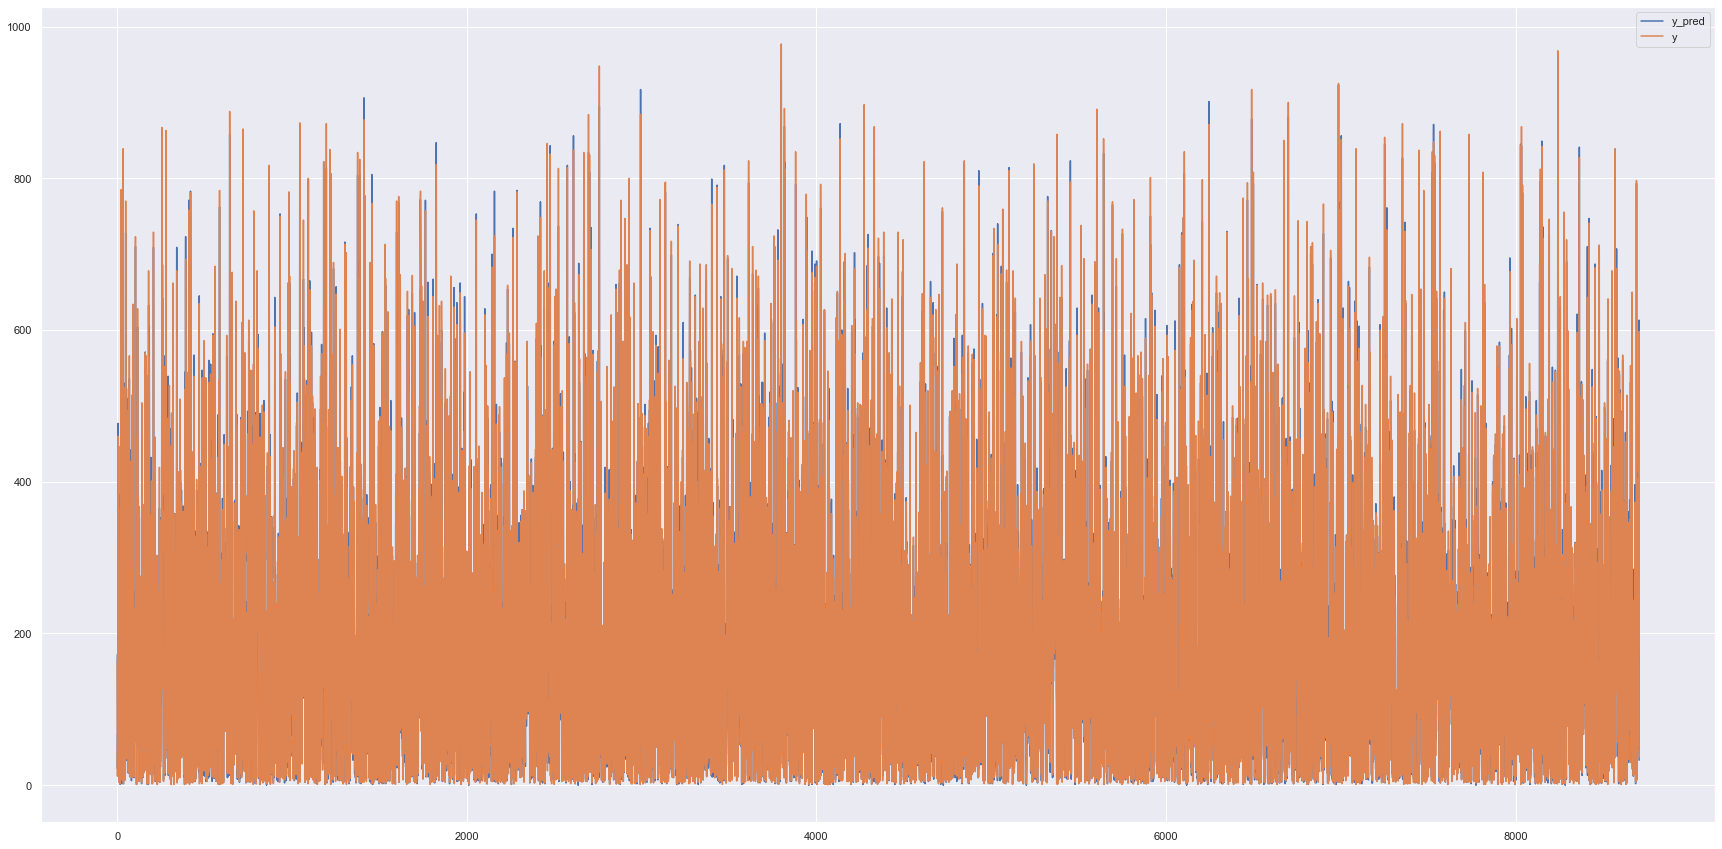

In [543]:
plt.rcParams["figure.figsize"] = (30,15)
visu_df.plot()
plt.show()

In [544]:
dif = y_pred_test-y_test
print(dif.sum())
print(f'y > y_pred の個数:  {len(dif[dif <0])}')
print(f'y = y_pred の個数:  {len(dif[dif ==0])}')
print(f'y < y_pred の個数:  {len(dif[dif >0])}')


-410
y > y_pred の個数:  1009
y = y_pred の個数:  85
y < y_pred の個数:  1084


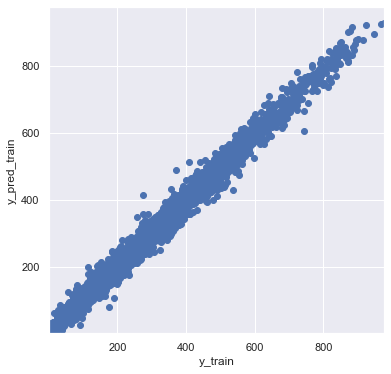

In [545]:
# グラフエリアを設定し、散布図を描く。
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_train)

# yの最大値、最小値を計算する。
y_max = np.max(y_train)
y_min = np.min(y_train)

# predict_yの最大値、最小値を計算する。
predict_y_max = np.max(y_pred_train)
predict_y_min = np.min(y_train)

# 全てのプロットが収まるようにするには、yとpredict_y両方のうち
# 最も小さい値、最も大きい値を縦軸横軸の範囲にすればいい。
axis_max = max(y_max, predict_y_max)
axis_min = min(y_min, predict_y_min)

plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.xlabel('y_train')
plt.ylabel('y_pred_train')

plt.show()

In [546]:
test_df = test_df.drop(['datetime','datetime_original'],axis=1)
test_df = test_df.astype(int)

In [547]:
#実際のtestデータの予測を作成
pred_test = model.predict(xgb.DMatrix(test_df))

In [548]:
sub = pd.read_csv('./input/sampleSubmission.csv')
pred_test = pred_test.astype(int)
pred_test[pred_test<0] = 0
sub['count']=pred_test

sub.head(125)

,datetime,count
0,2011-01-20 00:00:00,12
1,2011-01-20 01:00:00,4
2,2011-01-20 02:00:00,2
3,2011-01-20 03:00:00,2
4,2011-01-20 04:00:00,2
...,...,...
120,2011-01-25 04:00:00,2
121,2011-01-25 05:00:00,5
122,2011-01-25 06:00:00,33
123,2011-01-25 07:00:00,71


In [549]:
sub.to_csv('Subm_1.csv', index=False)
"""
from google.colab import files
files.download('Subm_1.csv') 
"""
"""1回目　Score 0.53463
   2回目  Score 0.52750
   3回目  Score 0.60054
   4回目  Score 0.64267
   5回目  Score 0.67732
   """

'1回目\u3000Score 0.53463\n   2回目  Score 0.52750\n   3回目  Score 0.60054\n   4回目  Score 0.64267\n   5回目  Score 0.67732\n   '

[Text(0.5, 0, 'hour'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'weather vs Count')]

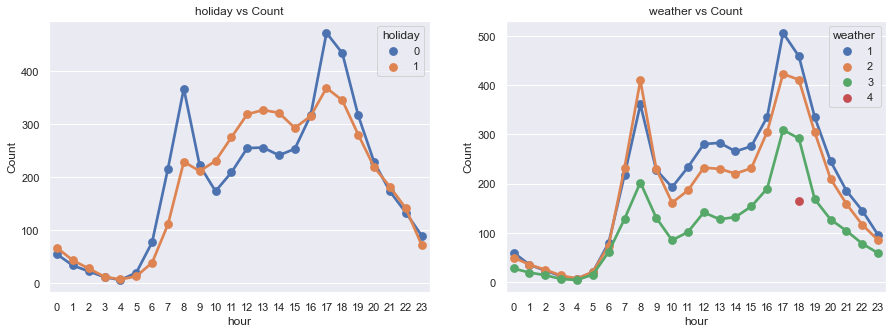

In [550]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 5)
hourholiday = pd.DataFrame(train_df.groupby(["hour","holiday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourholiday["hour"], y=hourholiday["count"],hue=hourholiday["holiday"], data=hourholiday, join=True, ax=axes[0])
hourweather = pd.DataFrame(train_df.groupby(["hour","weather"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourweather["hour"], y=hourweather["count"],hue=hourweather["weather"], data=hourweather, join=True, ax=axes[1])

axes[0].set(xlabel='hour', ylabel='Count',title="holiday vs Count")
axes[1].set(xlabel='hour', ylabel='Count',title="weather vs Count")

[Text(0.5, 0, 'hour'), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'month vs Count')]

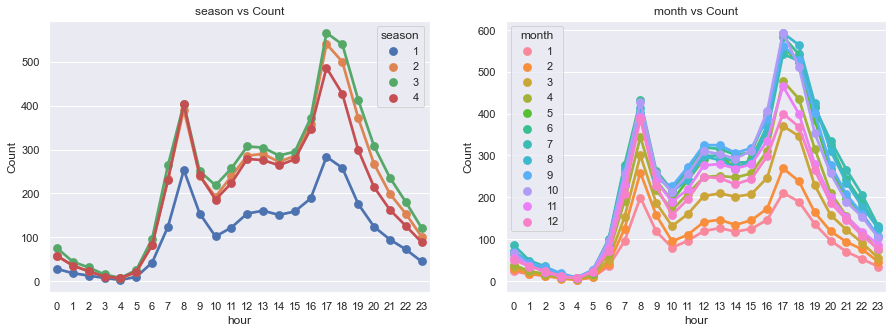

In [551]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 5)
hourseason = pd.DataFrame(train_df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourseason["hour"], y=hourseason["count"],hue=hourseason["season"], data=hourseason, join=True, ax=axes[0])
hourmonth = pd.DataFrame(train_df.groupby(["hour","month"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourmonth["hour"], y=hourmonth["count"],hue=hourmonth["month"], data=hourmonth, join=True, ax=axes[1])

axes[0].set(xlabel='hour', ylabel='Count',title="season vs Count")
axes[1].set(xlabel='hour', ylabel='Count',title="month vs Count")

[Text(0.5, 0, 'hour'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'workingday vs Count')]

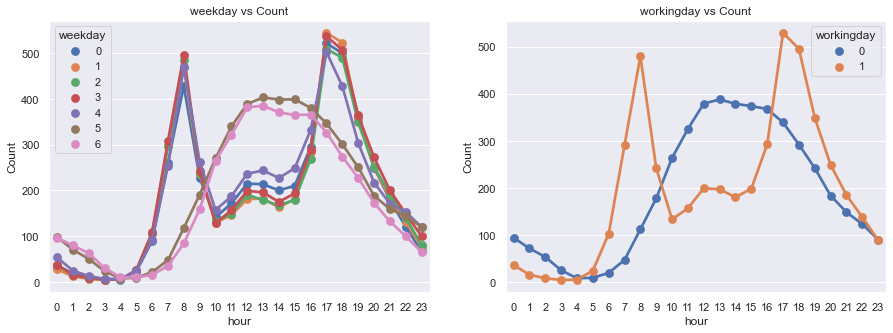

In [552]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 5)
hourweekday = pd.DataFrame(train_df).groupby(["hour","weekday"],sort=True)["count"].mean().reset_index()
sns.pointplot(x=hourweekday["hour"], y=hourweekday["count"],hue=hourweekday["weekday"], data=hourweekday, join=True, ax=axes[0])
hourworkingday = pd.DataFrame(train_df).groupby(["hour","workingday"],sort=True)["count"].mean().reset_index()
sns.pointplot(x=hourworkingday["hour"], y=hourworkingday["count"],hue=hourworkingday["workingday"], data=hourworkingday, join=True, ax=axes[1])

axes[0].set(xlabel='hour', ylabel='Count',title="weekday vs Count")
axes[1].set(xlabel='hour', ylabel='Count',title="workingday vs Count")

In [553]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import mean_squared_log_error as msle
from datetime import datetime

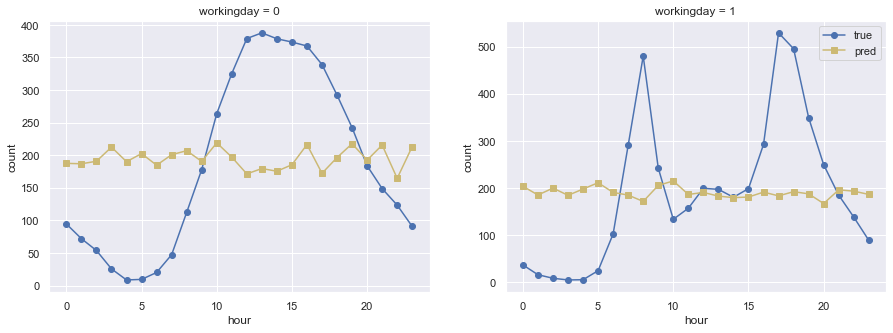

In [554]:
"""#１０分割の交差検証。それぞれで時間ごとの平均をとり、グラフにしてみる
kf = KFold(n_splits=10, shuffle=True, random_state=1).split(X_train, y_train)
kf_ = list(kf)

for train, valid in kf_:
  #ここから学習と予測
  model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dtest, "valid")],
    num_boost_round = 50,
    early_stopping_rounds=50,
  )
  #予測
  prediction = model.predict(xgb.DMatrix(train))
  
  prediction =prediction.astype(int)
  prediction[prediction < 0] = 0
  y_true = y_train.loc[valid]
  """
#ここからグラフの制作
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax_ = fig.add_subplot(122)
#検証用データ（実際の値）と予測値について時間ごと平均をとっている
count_hour_true = pd.DataFrame(train_df.groupby(["hour","workingday"],sort=True)["count"].mean()).reset_index()
preds = pd.concat([train_df.reset_index(), pd.Series(y_pred_train , name="count_pred").reset_index()], axis=1)
count_hour_pred = pd.DataFrame(preds.groupby(["hour", "workingday"], sort=True)["count_pred"].mean()).reset_index()
#workingdayの値ごとに変数に代入している
count_workingday_0_true = count_hour_true[count_hour_true["workingday"] == 0]
count_workingday_1_true = count_hour_true[count_hour_true["workingday"] == 1]
count_workingday_0_pred = count_hour_pred[count_hour_pred["workingday"] == 0]
count_workingday_1_pred = count_hour_pred[count_hour_pred["workingday"] == 1]
#グラフにプロット
ax.plot(count_workingday_0_true["hour"], count_workingday_0_true["count"], label="true", color="b", marker="o")
ax.plot(count_workingday_0_true["hour"], count_workingday_0_pred["count_pred"], label="pred", color="y", marker="s")
ax.set_xlabel("hour")
ax.set_ylabel("count")
ax.set_title("workingday = 0")
ax_.plot(count_workingday_1_true["hour"], count_workingday_1_true["count"], label = "true", color="b",marker="o")
ax_.plot(count_workingday_1_pred["hour"], count_workingday_1_pred["count_pred"], label="pred", color="y", marker="s")
ax_.set_xlabel("hour")
ax_.set_ylabel("count")
ax_.set_title("workingday = 1")
plt.legend()